# Summary stats on four sample plasmo genes-- 'crt', 'dhfr', 'dhps', 'mdr'

In [1]:
print('Hello Plasmo World :)')

Hello Plasmo World :)


In [2]:
#import required libraries

import zarr
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/am59/miniconda3/envs/amrwams/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#open zarr file

data = zarr.open('/Volumes/Team112/ra4/pf_60_public_release/Pf_60_public_wg.final.zarr', mode = 'r')
data

<zarr.hierarchy.Group '/' read-only>

In [4]:
#create chunked table

data_variants = allel.VariantChunkedTable(data = data['variants'], names =  ['CHROM', 
                                                                             'POS', 
                                                                             'FILTER_PASS', 
                                                                             'SNPEFF_AMINO_ACID_CHANGE',
                                                                             'SNPEFF_CODON_CHANGE',
                                                                             'SNPEFF_EFFECT',
                                                                             'SNPEFF_EXON_ID',
                                                                             'SNPEFF_FUNCTIONAL_CLASS',
                                                                             'SNPEFF_GENE_NAME',
                                                                             'SNPEFF_IMPACT',
                                                                             'is_snp'])

data_variants

<VariantChunkedTable shape=(6051696,) dtype=[('CHROM', 'O'), ('POS', '<i4'), ('FILTER_PASS', '?'), ('SNPEFF_AMINO_ACID_CHANGE', 'O'), ('SNPEFF_CODON_CHANGE', 'O'), ('SNPEFF_EFFECT', 'O'), ('SNPEFF_EXON_ID', 'O'), ('SNPEFF_FUNCTIONAL_CLASS', 'O'), ('SNPEFF_GENE_NAME', 'O'), ('SNPEFF_IMPACT', 'O'), ('is_snp', '?')]
   nbytes=404.0M cbytes=51.4M cratio=7.9
   values=zarr.hierarchy.Group>

In [5]:
#Extract out data in the chuked tables corresponding to the four genes

#chloroquine resistance transporter gene
crt = data_variants[:][np.where((data_variants['CHROM'] == 'Pf3D7_01_v3') & 
                          (data_variants['POS'] >= 406222) & 
                          (data_variants['POS'] <= 406317) & 
                          (data_variants['FILTER_PASS']))]

#dihydrofolate reductase gene

dhfr = data_variants[:][np.where((data_variants['CHROM'] == 'Pf3D7_04_v3') & 
                          (data_variants['POS'] >= 748088) & 
                          (data_variants['POS'] <= 749914) & 
                          (data_variants['FILTER_PASS']))]


#dihydropteroate synthase

dhps = data_variants[:][np.where((data_variants['CHROM'] == 'Pf3D7_08_v3') & 
                          (data_variants['POS'] >= 548200) & 
                          (data_variants['POS'] <= 550616) & 
                          (data_variants['FILTER_PASS']))]


#multidrug resistance protein

mdr = data_variants[:][np.where((data_variants['CHROM'] == 'Pf3D7_05_v3') & 
                          (data_variants['POS'] >= 957890) & 
                          (data_variants['POS'] <= 962149) & 
                          (data_variants['FILTER_PASS']))]


In [6]:
#Transform the extracted data into a pandas data frame

crt_pdframe = pd.DataFrame(crt)

dhfr_pdframe = pd.DataFrame(dhfr)

dhps_pdframe = pd.DataFrame(dhps)

mdr_pdframe = pd.DataFrame(mdr)

In [7]:
#Sample pandas dataframe for the crt gene 

crt_pdframe

,CHROM,POS,FILTER_PASS,SNPEFF_AMINO_ACID_CHANGE,SNPEFF_CODON_CHANGE,SNPEFF_EFFECT,SNPEFF_EXON_ID,SNPEFF_FUNCTIONAL_CLASS,SNPEFF_GENE_NAME,SNPEFF_IMPACT,is_snp
0,Pf3D7_01_v3,406228,True,NHNNIN164,aatcataataatataaat/,FRAME_SHIFT,1,NONE,PIP5K,HIGH,False
1,Pf3D7_01_v3,406229,True,N164S,aAt/aGt,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False
2,Pf3D7_01_v3,406231,True,H165N,Cat/Aat,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False
3,Pf3D7_01_v3,406232,True,H165R,cAt/cGt,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False
4,Pf3D7_01_v3,406234,True,N166D,Aat/Gat,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False
5,Pf3D7_01_v3,406237,True,N167H,Aat/Cat,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False
6,Pf3D7_01_v3,406239,True,N167K,aaT/aaG,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False
7,Pf3D7_01_v3,406240,True,ING168S,ataaatggt/agt,CODON_CHANGE_PLUS_CODON_DELETION,1,NONE,PIP5K,MODERATE,False
8,Pf3D7_01_v3,406242,True,I168M,atA/atG,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False
9,Pf3D7_01_v3,406244,True,N169I,aAt/aTt,NON_SYNONYMOUS_CODING,1,MISSENSE,PIP5K,MODERATE,False


In [8]:
#Calculate how many mutations are snps

crt_pdframe['is_snp'].value_counts()

False    31
Name: is_snp, dtype: int64

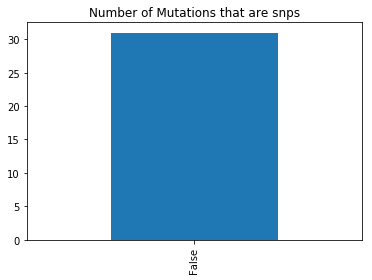

In [9]:
#generate corresponding plot

crt_pdframe['is_snp'].value_counts().plot.bar(title = 'Number of Mutations that are snps')

In [10]:
#sub-group the data based on snpeff effect

crt_pdframe['SNPEFF_EFFECT'].value_counts()

NON_SYNONYMOUS_CODING               15
FRAME_SHIFT                         10
CODON_DELETION                       4
SYNONYMOUS_CODING                    1
CODON_CHANGE_PLUS_CODON_DELETION     1
Name: SNPEFF_EFFECT, dtype: int64

In [11]:
#determine the impact of snpeff_effect

crt_pdframe.groupby(['SNPEFF_EFFECT', 'SNPEFF_IMPACT'])['FILTER_PASS'].count()

SNPEFF_EFFECT                     SNPEFF_IMPACT
CODON_CHANGE_PLUS_CODON_DELETION  MODERATE          1
CODON_DELETION                    MODERATE          4
FRAME_SHIFT                       HIGH             10
NON_SYNONYMOUS_CODING             MODERATE         15
SYNONYMOUS_CODING                 LOW               1
Name: FILTER_PASS, dtype: int64

In [12]:
##The same steps repeated for the other 3 genes


## dhfr

In [13]:
dhfr_pdframe['is_snp'].value_counts()

True     52
False     1
Name: is_snp, dtype: int64

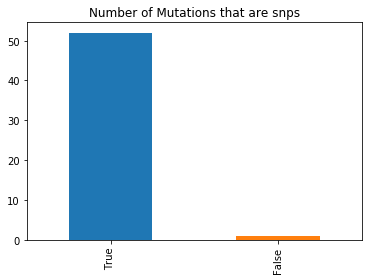

In [14]:
dhfr_pdframe['is_snp'].value_counts().plot.bar(title = 'Number of Mutations that are snps')

In [15]:
dhfr_pdframe['SNPEFF_EFFECT'].value_counts()

SYNONYMOUS_CODING        28
NON_SYNONYMOUS_CODING    24
CODON_DELETION            1
Name: SNPEFF_EFFECT, dtype: int64

In [16]:
dhfr_pdframe.groupby(['SNPEFF_EFFECT', 'SNPEFF_IMPACT'])['FILTER_PASS'].count()

SNPEFF_EFFECT          SNPEFF_IMPACT
CODON_DELETION         MODERATE          1
NON_SYNONYMOUS_CODING  MODERATE         24
SYNONYMOUS_CODING      LOW              28
Name: FILTER_PASS, dtype: int64

## dhps

In [17]:
dhps_pdframe['is_snp'].value_counts()

True     52
False    30
Name: is_snp, dtype: int64

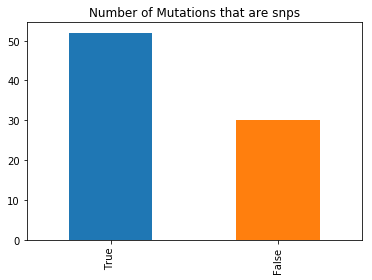

In [18]:
dhps_pdframe['is_snp'].value_counts().plot.bar(title = 'Number of Mutations that are snps')

In [19]:
dhps_pdframe['SNPEFF_EFFECT'].value_counts()

INTRON                   33
NON_SYNONYMOUS_CODING    29
SYNONYMOUS_CODING        17
FRAME_SHIFT               1
CODON_INSERTION           1
STOP_GAINED               1
Name: SNPEFF_EFFECT, dtype: int64

In [20]:
dhps_pdframe.groupby(['SNPEFF_EFFECT', 'SNPEFF_IMPACT'])['FILTER_PASS'].count()

SNPEFF_EFFECT          SNPEFF_IMPACT
CODON_INSERTION        MODERATE          1
FRAME_SHIFT            HIGH              1
INTRON                 MODIFIER         33
NON_SYNONYMOUS_CODING  MODERATE         29
STOP_GAINED            HIGH              1
SYNONYMOUS_CODING      LOW              17
Name: FILTER_PASS, dtype: int64

## mdr

In [21]:
mdr_pdframe['is_snp'].value_counts()

True     384
False     40
Name: is_snp, dtype: int64

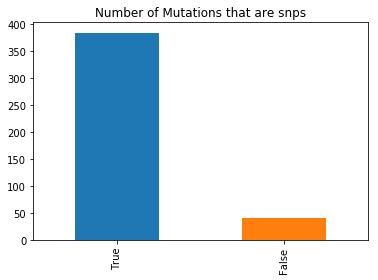

In [22]:
mdr_pdframe['is_snp'].value_counts().plot.bar(title = 'Number of Mutations that are snps')

In [23]:
mdr_pdframe['SNPEFF_EFFECT'].value_counts()

NON_SYNONYMOUS_CODING    225
SYNONYMOUS_CODING        183
FRAME_SHIFT                7
CODON_DELETION             4
CODON_INSERTION            4
SYNONYMOUS_STOP            1
Name: SNPEFF_EFFECT, dtype: int64

In [24]:
kl = mdr_pdframe.groupby(['SNPEFF_EFFECT', 'SNPEFF_IMPACT'])['FILTER_PASS'].count()
kl

SNPEFF_EFFECT          SNPEFF_IMPACT
CODON_DELETION         MODERATE           4
CODON_INSERTION        MODERATE           4
FRAME_SHIFT            HIGH               7
NON_SYNONYMOUS_CODING  MODERATE         225
SYNONYMOUS_CODING      LOW              183
SYNONYMOUS_STOP        LOW                1
Name: FILTER_PASS, dtype: int64

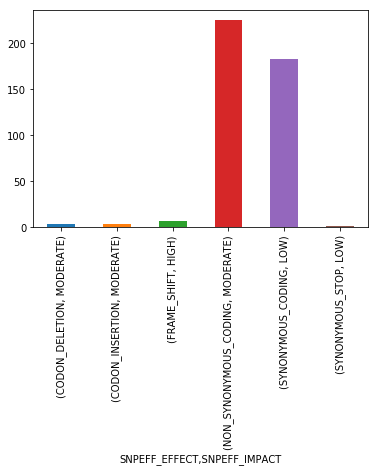

In [25]:
#Generate corresonding plot

kl.plot.bar()

In [26]:
#determine the impact of snpeff_effect for only snps

kp = mdr_pdframe[mdr_pdframe['is_snp']].groupby(['SNPEFF_EFFECT', 'SNPEFF_IMPACT'])['FILTER_PASS'].count()
kp

SNPEFF_EFFECT          SNPEFF_IMPACT
NON_SYNONYMOUS_CODING  MODERATE         203
SYNONYMOUS_CODING      LOW              180
SYNONYMOUS_STOP        LOW                1
Name: FILTER_PASS, dtype: int64

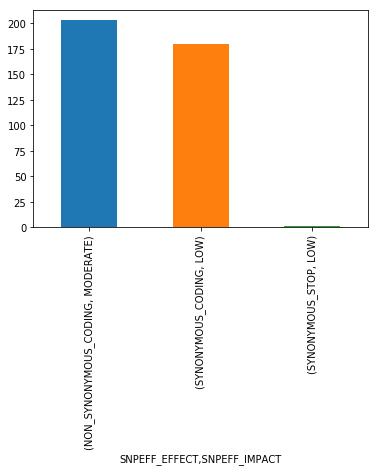

In [27]:
#Generate corresponding plot

kp.plot.bar()

# END